<a href="https://colab.research.google.com/github/munshidds/Dog_Breed_Identification/blob/main/Dog_Breed_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#End-to-end multi-class dog breed classification


In [ ]:
#Unzip the uploaded data in the google drive
#!unzip "drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "drive/MyDrive/Dog Vision/"

In [ ]:
# !unzip "drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "drive/MyDrive/Dog Vision/"

In [ ]:
#Import tensorflow into colab
import tensorflow as tf
import tensorflow_hub as hub  #to pick a model
print("TF version:",tf.__version__)
print("TF Hub version:", hub.__version__)

#Check for GPU availability
print("GPU", "available (YESSSSS!!!!!!)" if tf.config.list_physical_devices("GPU") else "not available")

TF version: 2.8.2
TF Hub version: 0.12.0
GPU available (YESSSSS!!!!!!)


In [ ]:
##Getting the data ready
import pandas as pd
import matplotlib.pyplot as plt
labels_csv = pd.read_csv("drive/MyDrive/Dog Vision/labels.csv")
labels_csv.shape

(10222, 2)

In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
labels_csv.breed.value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

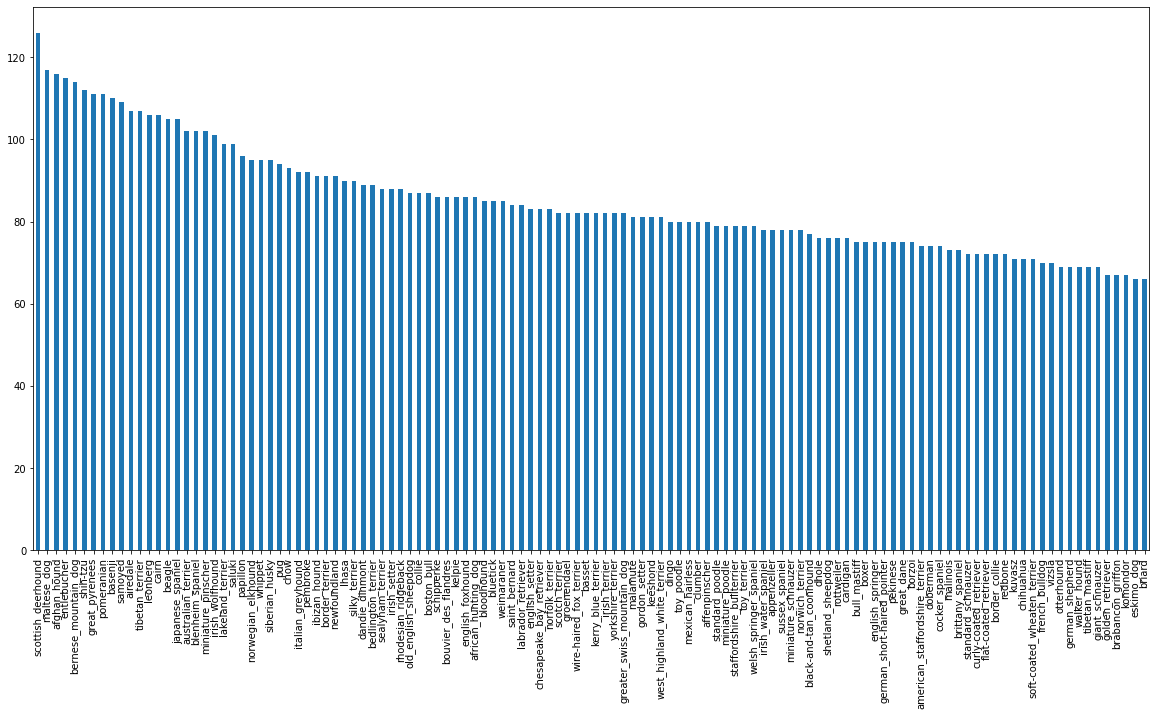

In [ ]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [ ]:
## Getting images and their labels
filenames = ["drive/MyDrive/Dog Vision/train/"+ fname+ ".jpg" for fname in labels_csv["id"]]
filenames[:10]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

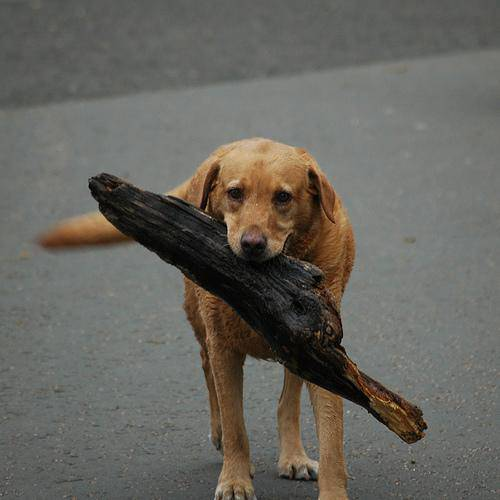

In [ ]:
from IPython.display import Image
Image("drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg")

In [ ]:
len(filenames)

10222

In [ ]:
len(os.listdir("drive/MyDrive/Dog Vision/train/"))

10222

In [ ]:
#check whether no. of filenames matches no. of actual files
import os
if len(os.listdir("drive/MyDrive/Dog Vision/train/")) == len(filenames):
  print("Filenames match actual amount of files!!! Proceed.")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames do not match actual amount of files, check the target directory.


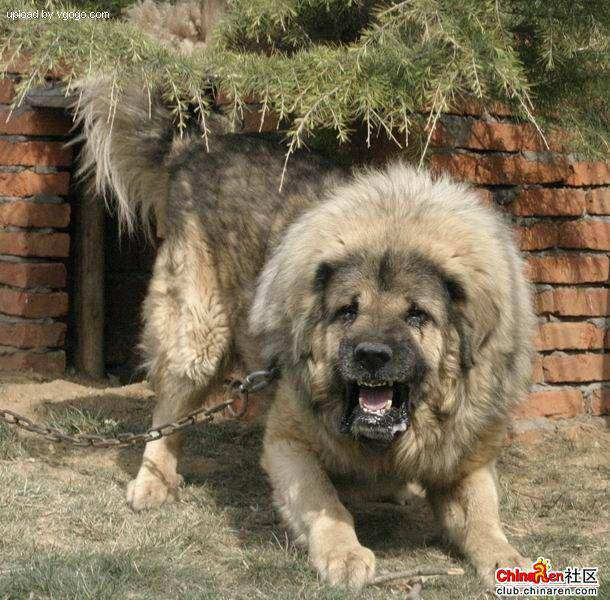

In [ ]:
# accessing images using the filenames saved.
Image(filenames[9000]) # a random check

In [ ]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [ ]:
## Convert the labels into an array of values
import numpy as np
labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
# check if no. of labels matches the no. of filenames
if len(labels) == len(filenames):
  print("Number of labels matches no. of filenames...")
else:
  print("Number of labels does not match no. of filenames, check data directories!!" )

Number of labels matches no. of filenames...


In [ ]:
#Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds) #gives the number of different breeds in the data

120

In [ ]:
#Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
# Creating our own validation set
X = filenames
y = boolean_labels
# Experiment with a portion of the data and not the data as a whole
NUM_IMAGES = 1000 #@param{type:"slider", min:1000, max:10000, step:100} 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
X_train[:2], y_train[:2]

(['drive/MyDrive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, Fal

##Preprocessing images (turning images to tensors)

Things to do for preprocessing:
1. Take an image filepath as input
2. Use Tensorflow to read the file and save it to a variable, 'image'
3. Turn our 'image' (a jpg) into Tensors
5. Normalize the image
6. Resize the 'image' to be a shape of (224, 224)
7. Return the modified 'image'


In [ ]:
#A function to do all the above preprocessing
IMG_SIZE = 224
def process_image(image_path, img_size = IMG_SIZE):
  image = tf.io.read_file(image_path)
  #Turn the jpg image into numerical Tensor with 3 colour channels so 
  #that the tensor can be run fastly on a GPU than numpy array
  image = tf.image.decode_jpeg(image, channels=3)
  #Normalization
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[img_size, img_size])
  return image


###Turning data into batches
Processing the entire data in one go may not fit into the memory. So a batch is processed at a time.
To use TensorFlow effectively, we need the data in the form of Tensor tuples as:
'(image, label)'

In [ ]:
# Turning data into batches
#Function to return a tuple of tensors

def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

BATCH_SIZE = 32 # default value used
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  if test_data:
    print("Creating test data batches...")
    # slice tensors along their first dimension
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),# filepaths
                                                 tf.constant(y)))# labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

#when the data is train data
  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    #Shuffling pathnames and labels
    data = data.shuffle(buffer_size=len(X))
    #create (image, label) tuples
    #this also pre process the images
    data = data.map(get_image_label)
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
# Create training and validation batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


## Building a model
Things to be defined for building a model
* The input shape to our model
* The output shape of our model
* The URL of the model we want to use

In [ ]:
# Setup input shape, output shape, model URL to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] #batch, height, width, channels
OUTPUT_SHAPE = len(unique_breeds)
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"  #took from tensorflow hub-Architecture section

In [ ]:
def create_model(input_shape= INPUT_SHAPE, output_shape= OUTPUT_SHAPE, model_url = MODEL_URL):
  print("Building model with:", MODEL_URL)
  # Setup model layers
  model = tf.keras.Sequential([hub.KerasLayer(MODEL_URL),                   #layer1-input layer
                              
                               tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                                  activation="softmax")     #layer2-output layer
                               ])
  #Compile model
  model.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(),metrics = ["accuracy"])

  # Build the model
  model.build(INPUT_SHAPE)
  return model


In [ ]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

### Training the model (only on a subset of data)
only on 1000 images



In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100,step:10}

In [ ]:
 def train_model():
   model = create_model()
   model.fit(x=train_data,
             epochs = NUM_EPOCHS,
             validation_data = val_data,
             validation_freq=1,
             callbacks=[early_stopping])
   return model

In [ ]:
model = train_model() 

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 142s 5s/step - loss: 4.5454 - accuracy: 0.0862 - val_loss: 3.3919 - val_accuracy: 0.2600
Epoch 2/100
25/25 [==============================] - 3s 133ms/step - loss: 1.6462 - accuracy: 0.6750 - val_loss: 2.1923 - val_accuracy: 0.4900
Epoch 3/100
25/25 [==============================] - 4s 155ms/step - loss: 0.5695 - accuracy: 0.9325 - val_loss: 1.6792 - val_accuracy: 0.6050
Epoch 4/100
25/25 [==============================] - 4s 156ms/step - loss: 0.2552 - accuracy: 0.9900 - val_loss: 1.5153 - val_accuracy: 0.6200
Epoch 5/100
25/25 [==============================] - 4s 162ms/step - loss: 0.1463 - accuracy: 1.0000 - val_loss: 1.4251 - val_accuracy: 0.6250
Epoch 6/100
25/25 [==============================] - 4s 160ms/step - loss: 0.0993 - accuracy: 1.0000 - val_loss: 1.3743 - val_accuracy: 0.6650
Epoch 7/100
25/25 [==============================]

### Making predictions using a trained model


In [ ]:
predictions = model.predict(val_data,verbose=1)
predictions
#the prediction array will be having values in the interval (0,1) since we used 'softmax'

7/7 [==============================] - 1s 99ms/step


array([[2.0021242e-03, 9.9404402e-05, 7.7584264e-04, ..., 5.0148024e-04,
        3.9482577e-05, 1.2683638e-02],
       [4.1714660e-03, 8.9821010e-04, 2.8122054e-02, ..., 5.9714267e-04,
        1.0333844e-02, 5.7535927e-04],
       [6.3433840e-06, 2.9351126e-05, 1.8873663e-05, ..., 3.1041029e-05,
        7.4268191e-06, 1.4540668e-04],
       ...,
       [7.3550626e-05, 1.7955892e-04, 2.6497483e-04, ..., 1.4276283e-04,
        4.5539319e-04, 9.3740789e-05],
       [4.1089668e-03, 5.8040494e-04, 1.9392770e-04, ..., 2.8619796e-04,
        1.0449400e-04, 1.2699516e-02],
       [1.4164949e-04, 3.8808368e-05, 3.0118045e-03, ..., 2.1653187e-03,
        1.5644441e-04, 4.8513837e-05]], dtype=float32)

In [ ]:
# First prediction
index = 42
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

Max value (probability of prediction): 0.5078977942466736
Max index: 39
Predicted label: english_foxhound


In [ ]:
# Turn prediction probabilities into their respective labels
def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]
pred_label = get_pred_label(predictions[81])
pred_label

'dingo'

######Since the validation data is still in a batch dataset, it has to be unbatched to make predictions on the validation images and then compare those predictions to the validation labels(truth labels)

In [ ]:
# Unbatch data
def unbatchify(data):
  images = []
  labels = []
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels


In [ ]:
val_images, val_labels = unbatchify(val_data)

In [ ]:
get_pred_label(val_labels[0])

'affenpinscher'

###### Visualizing model predictions


In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  pred_label = get_pred_label(pred_prob)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_label==true_label:
    color ="green"
  else:
    color="red"
  plt.title("{} {:2.0f}% {}".format(pred_label, np.max(pred_prob)*100, true_label), color=color)

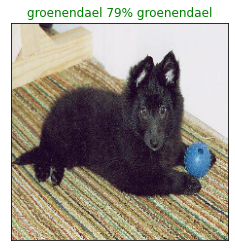

In [ ]:
plot_pred(prediction_probabilities = predictions,
          labels=val_labels,
          images=val_images, n=77)

In [ ]:
# Function for Saving a trained model
def save_model(model, suffix=None):
  modeldir = os.path.join("drive/MyDrive/Dog Vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix+ ".h5" # extension of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path


In [ ]:
#Create a function to load a trained model
def load_model(model_path):
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer}) # custom_objects: Optional dictionary mapping names (strings) 
                                     # to custom classes or functions to be considered during deserialization.
  return model

In [ ]:
#Save model
import datetime
save_model(model, suffix = "1000-images-mobilenetv2-Adam")

Saving model to: drive/MyDrive/Dog Vision/models/20220607-10441654598690-1000-images-mobilenetv2-Adam.h5...


'drive/MyDrive/Dog Vision/models/20220607-10441654598690-1000-images-mobilenetv2-Adam.h5'

In [ ]:
#Reload a trained model
loaded_1000_image_model = load_model('drive/MyDrive/Dog Vision/models/20201222-04021608609731-1000-images-mobilenetv2-Adam.h5')

Loading saved model from: drive/MyDrive/Dog Vision/models/20201222-04021608609731-1000-images-mobilenetv2-Adam.h5


#Training the model on the full dataset

In [ ]:
# Create a data batch with full data set
full_data = create_data_batches(X,y)
# Create a model for full model
full_model = create_model() 
# Create full model callbacks
full_model_early_stopping =tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                            patience=3)

# Fit the full model
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_early_stopping])
# the model is trained on the full data set
#the output not shown here due to error in automatic saving

#Saving the model
save_model(full_model, suffix = "full-image-set-mobilenetv2-Adam")

Creating training data batches...
Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
320/320 [==============================] - 48s 138ms/step - loss: 1.3344 - accuracy: 0.6699
Epoch 2/100
320/320 [==============================] - 36s 112ms/step - loss: 0.4036 - accuracy: 0.8802
Epoch 3/100
320/320 [==============================] - 37s 115ms/step - loss: 0.2400 - accuracy: 0.9312
Epoch 4/100
320/320 [==============================] - 37s 116ms/step - loss: 0.1543 - accuracy: 0.9618
Epoch 5/100
320/320 [==============================] - 38s 117ms/step - loss: 0.1044 - accuracy: 0.9803
Epoch 6/100
320/320 [==============================] - 38s 117ms/step - loss: 0.0779 - accuracy: 0.9862
Epoch 7/100
320/320 [==============================] - 38s 118ms/step - loss: 0.0572 - accuracy: 0.9917
Epoch 8/100
320/320 [==============================] - 40s 126ms/step - loss: 0.0465 - accuracy: 0.9941
Epoch 9/100
320/320 [====================

'drive/MyDrive/Dog Vision/models/20220607-11061654599970-full-image-set-mobilenetv2-Adam.h5'

In [ ]:
loaded_full_model = load_model('drive/MyDrive/Dog Vision/models/20201222-08581608627513-full-image-set-mobilenetv2-Adam.h5')

Loading saved model from: drive/MyDrive/Dog Vision/models/20201222-08581608627513-full-image-set-mobilenetv2-Adam.h5


Making predictions on custom images

In [ ]:
custom_path = "drive/MyDrive/Dog Vision/Custom dog images/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
custom_image_paths

['drive/MyDrive/Dog Vision/Custom dog images/download (1).jpg',
 'drive/MyDrive/Dog Vision/Custom dog images/download (2).jpg',
 'drive/MyDrive/Dog Vision/Custom dog images/download.jpg',
 'drive/MyDrive/Dog Vision/Custom dog images/file380.jpg']

In [ ]:
# Create databatches for the test data
custom_data = create_data_batches(custom_image_paths, test_data =True)
custom_data

Creating test data batches...


<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# Make predictions
custom_preds = loaded_full_model.predict(custom_data)
custom_preds.shape

(4, 120)

In [ ]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['cairn', 'tibetan_mastiff', 'rottweiler', 'toy_terrier']

In [ ]:
# Get custom images
custom_images = []
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

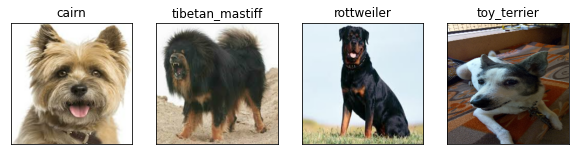

In [ ]:
#Check custom predictions
import matplotlib.pyplot as plt
plt.figure(figsize =(10,10))
for i, image in enumerate(custom_images):
  plt.subplot(1,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)